In [26]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#加载数据集
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

In [3]:
word_index = imdb.get_word_index()    #将单词映射为整数
reverse_word_index = dict([(value, key) for(key, value) in word_index.items()])  #将整数索引映射为单词
decoded_reveiw = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #解码
decoded_reveiw

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
#将整数序列编码为二进制矩阵(train_data里是许多整数序列, x_train为二进制矩阵)
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
#模型定义
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))   #rectified linear unit 将所有负数归零
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))     #sigmoid 将值压缩到【0,1】区间

In [9]:
#编译模型
model.compile(optimizer= 'rmsprop',
             loss = 'binary_crossentropy',    #对于二分类问题使用二元交叉熵作为损失函数
             metrics=['accuracy'])

In [16]:
#留出10000个作为验证集，15000作为训练集
x_val = x_train[:10000]
x_train_part = x_train[10000: ]
y_val = y_train[:10000]
y_train_part = y_train[10000: ]

In [23]:
#训练模型
history = model.fit(x_train_part,
                  y_train_part,
                  epochs = 20,     #训练20个轮次，即对x_train_part和y_train_part两个张量中的所有样本进行20次迭代
                  batch_size = 512,
                  validation_data= (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 16s 48ms/step - loss: 0.5966 - accuracy: 0.6956 - val_loss: 0.4129 - val_accuracy: 0.8372
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3334 - accuracy: 0.8990 - val_loss: 0.3090 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2295 - accuracy: 0.9350 - val_loss: 0.2841 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1847 - accuracy: 0.9417 - val_loss: 0.2751 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1478 - accuracy: 0.9534 - val_loss: 0.2852 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1163 - accuracy: 0.9666 - val_loss: 0.3023 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0964 - accuracy: 0.9730 - val_loss: 0.3140 - val_accuracy: 0.8798
Epoch 8/20
3

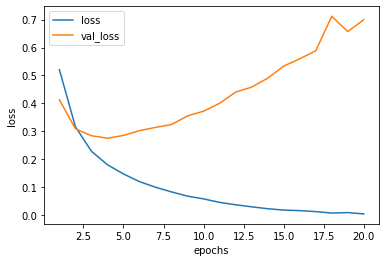

In [46]:
#观察训练过程
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, history_dict['loss'], label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, history_dict['val_loss'], label = 'val_loss')
plt.legend()

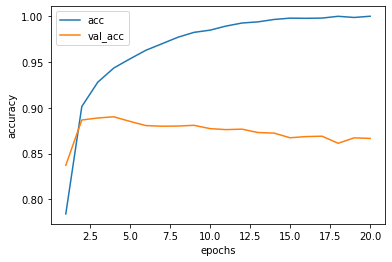

In [47]:
plt.plot(epochs, history_dict['accuracy'], label = 'acc')
plt.plot(epochs, history_dict['val_accuracy'], label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [54]:
#观察发现在第四轮达到了最大精度，故重新训练一个模型，只训练四轮
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)
model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5520 - accuracy: 0.7429
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2690 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2045 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 1s 967us/step - loss: 0.3093 - accuracy: 0.8768


array([[0.174382  ],
       [0.99983966],
       [0.75519526],
       ...,
       [0.0981167 ],
       [0.05875951],
       [0.59497404]], dtype=float32)